In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd  


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузка данных
boston_dataset = load_boston()

print(boston_dataset.keys())
boston_dataset.DESCR

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [3]:
X = boston_dataset.data # ‘data’ - многомерный массив 506 на 13
Y = boston_dataset.target # ‘target’ - многомерный массив с маркером на каждую строку

In [4]:
# Разделение набора данных на тренировочные и тестовые части
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

- X_train и Y_train - тренировочные наборы данных
- X_test и Y_test – для расчета прогнозных значений. 
- Y_test не участвует в расчёте прогноза: с помощью метода ‘score’, подсчитаем правильные ответы с помощью метрики.

In [5]:
# Параметры оценивания
num_folds = 10
n_iter = 1000
n_estimators = 100
scoring = 'r2'# коэффициент детерминации - метрика для оценки: чем ближе к 1,00, тем выше качество

### Проверка на исходных, необработанных данных

In [6]:
model = GradientBoostingRegressor(n_estimators=n_estimators)

In [7]:
kfold = KFold(n_splits=num_folds)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=
                                 scoring)
    
m_fit = model.fit(X_train, Y_train)
m_predict = model.predict(X_test)
m_score = model.score(X_test, Y_test)

In [8]:
print("GradientBoostingRegressor, необработанные данные")  
print("Cредняя оценка 10-кратной перекрёстной проверки на тренировочных данных:", round(cv_results.mean(), 3)) 
print("Cреднее квадратичное отклонение: ", round(cv_results.std(), 3)) 
print("Значение метрики на тестовых данных test = ", round(m_score, 3))

GradientBoostingRegressor, необработанные данные
Cредняя оценка 10-кратной перекрёстной проверки на тренировочных данных: 0.879
Cреднее квадратичное отклонение:  0.04
Значение метрики на тестовых данных test =  0.863


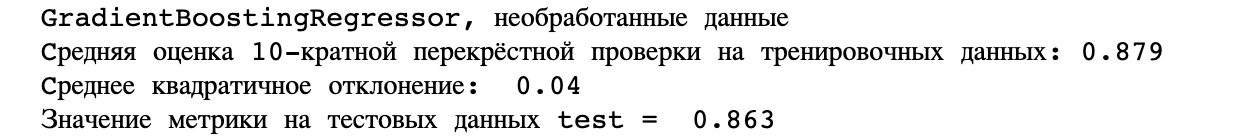

### Проверка на стандартизованных данных

In [9]:
# Стандартизация данных
# Стандартизация значений характеристик
std_x = StandardScaler()
X_train_SS = std_x.fit_transform(X_train)
X_test_SS = std_x.transform(X_test)

# Стандартизация целевых значений
std_y = StandardScaler()
Y_train_SS = std_y.fit_transform(Y_train.reshape(-1, 1))
Y_test_SS = std_y.transform(Y_test.reshape(-1, 1))

In [10]:
kfold = KFold(n_splits=num_folds)
cv_results_SS = cross_val_score(model, X_train_SS, Y_train_SS, cv=kfold, scoring=
                                 scoring)
    
m_fit_SS = model.fit(X_train_SS, Y_train_SS)
m_predict_SS = model.predict(X_test_SS)
m_score_SS = model.score(X_test_SS, Y_test_SS)

In [13]:
print("GradientBoostingRegressor, стандартизованные данные")  
print("Cредняя оценка 10-кратной перекрёстной проверки на тренировочных данных:", round(cv_results_SS.mean(), 3)) 
print("Cреднее квадратичное отклонение: ", round(cv_results_SS.std(), 3)) 
print("Значение метрики на тестовых данных test = ", round(m_score_SS, 3))

GradientBoostingRegressor, стандартизованные данные
Cредняя оценка 10-кратной перекрёстной проверки на тренировочных данных: 0.879
Cреднее квадратичное отклонение:  0.04
Значение метрики на тестовых данных test =  0.863


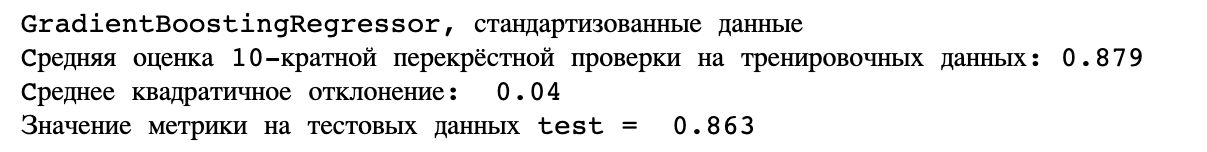

Вывод: влияние предобработки на финальные показатели модели незначительно.